In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("C:\\Users\\2211444\\Desktop\\Udemy Python Masterclass\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\mouse_viral_study.csv")

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


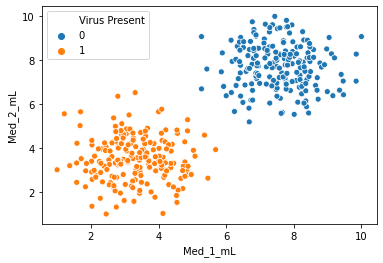

In [4]:
sns.scatterplot(x="Med_1_mL",y="Med_2_mL",hue="Virus Present",data=df)

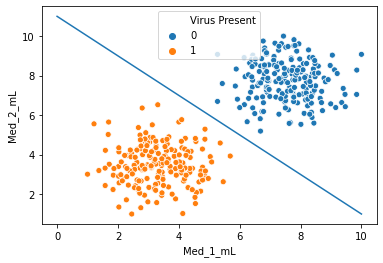

In [5]:
sns.scatterplot(x="Med_1_mL",y="Med_2_mL",hue="Virus Present",data=df)



#developing a hyperplane





x=np.linspace(0,10,100) #as the x value lies in the range 0 to 10
m=-1 # the slope of hyperplane is negative linear
b=11 # intercept
y=m*x + b #equation of hyperplane

plt.plot(x,y)

In [6]:
from sklearn.svm import SVC

In [7]:
y=df['Virus Present']
X=df.drop('Virus Present',axis=1)

There are various types of kernel like
* Linear
* poly
* rbf(its the best)
* sigmoid
* precomputed

In [8]:
model= SVC(kernel="linear",C=1000)

In [9]:
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [10]:
from svm_margin_plot import plot_svm_boundary #already existing py file in the same directory

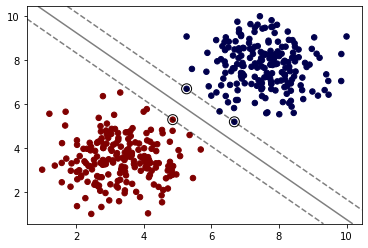

In [11]:
plot_svm_boundary(model,X,y)

In [12]:
model=SVC(kernel='linear',C=0.05)
model.fit(X,y)

SVC(C=0.05, kernel='linear')

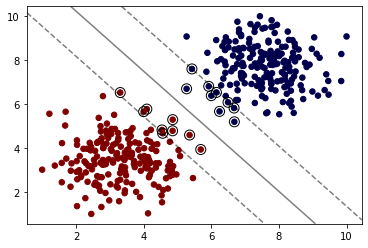

In [13]:
plot_svm_boundary(model,X,y)

As the C value gets closer to zero, we are allowing more and more points to go to margin

* note ; the C value here is inversely proportional to the soft margin parameter

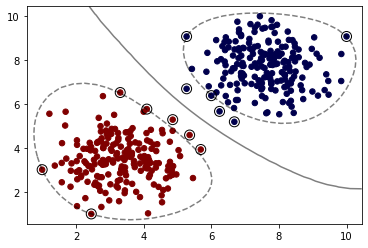

In [14]:
model=SVC(kernel="rbf",C=1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

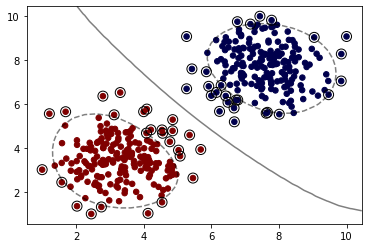

In [15]:
model=SVC(kernel="rbf",C=0.1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

As C value decreases,It allows more points to be between the margin and hyperplane.

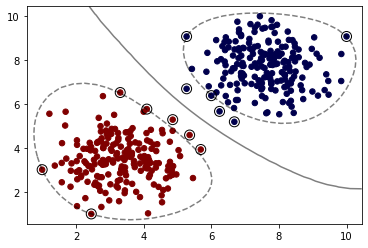

In [16]:
model=SVC(kernel="rbf",C=1,gamma='scale')
model.fit(X,y)
plot_svm_boundary(model,X,y)

gamma determines how much influence A SINGLE TRAINING PPOINT HAS. here we see no change as gamma= scale is the default value . But notice the change when gamma= auto

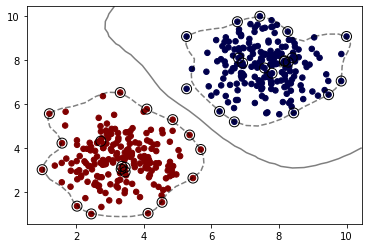

In [17]:
model=SVC(kernel="rbf",C=1,gamma='auto')
model.fit(X,y)
plot_svm_boundary(model,X,y)

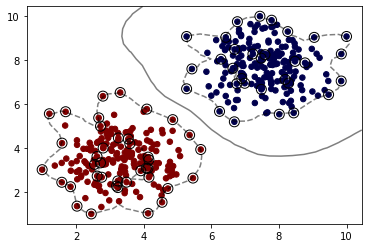

In [18]:
model=SVC(kernel="rbf",C=1,gamma=0.9)
model.fit(X,y)
plot_svm_boundary(model,X,y)

As the gamma value gets larger and larger it tries to fit more of the training data, so it leads to overfitting 

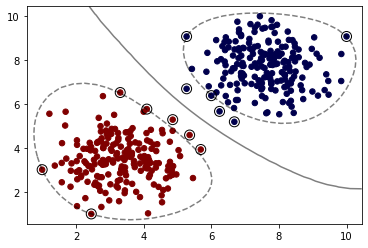

In [19]:
model=SVC(kernel="rbf",C=1,gamma='scale')
model.fit(X,y)
plot_svm_boundary(model,X,y)

Gamma =scale , balances the bias variance tradeoff

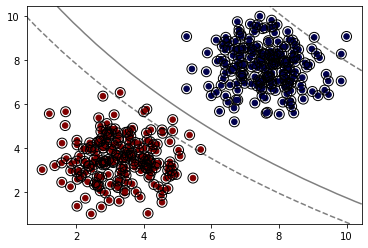

In [20]:
model=SVC(kernel='sigmoid')
model.fit(X,y)
plot_svm_boundary(model,X,y)

Here pretty much all the points are being highlighted as support vectors hence this is not a good kernel for my model

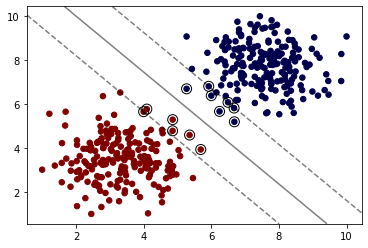

In [21]:
model=SVC(kernel='poly',degree=1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

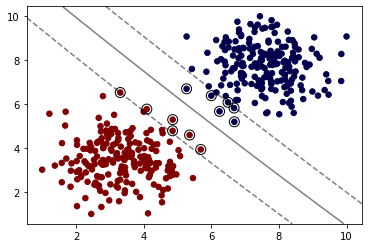

In [22]:
model=SVC(kernel='poly',degree=2,C=0.05)
model.fit(X,y)
plot_svm_boundary(model,X,y)

#### Grid serach to find the best parameters for SVM

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
svm=SVC()
param_grid={'C':[0.01,0.1,1],'kernel':['linear','rbf']}

In [26]:
grid=GridSearchCV(svm,param_grid)

In [27]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [28]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

## Support Vector Regression: to predict continuous labels

In [29]:
df=pd.read_csv("C:\\Users\\2211444\\Desktop\\Udemy Python Masterclass\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\cement_slump.csv")

In [30]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


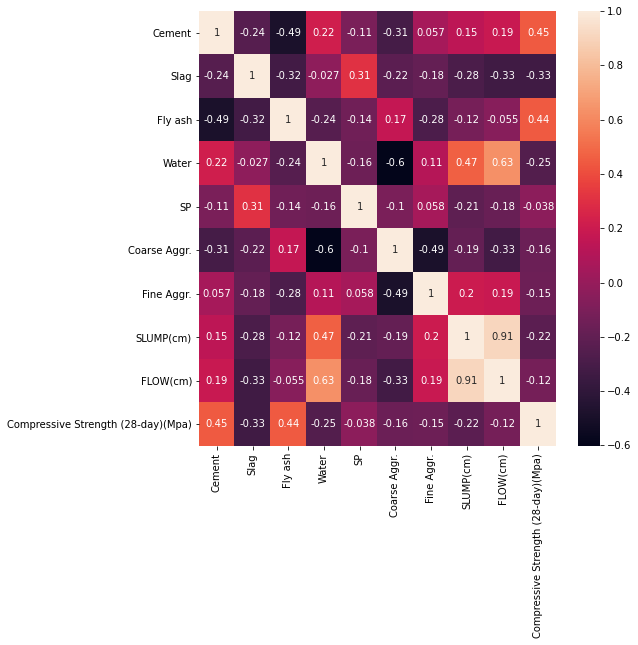

In [31]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

In [33]:
df.corr()['Compressive Strength (28-day)(Mpa)']

Cement                                0.445656
Slag                                 -0.331522
Fly ash                               0.444380
Water                                -0.254320
SP                                   -0.037909
Coarse Aggr.                         -0.160610
Fine Aggr.                           -0.154532
SLUMP(cm)                            -0.223499
FLOW(cm)                             -0.124189
Compressive Strength (28-day)(Mpa)    1.000000
Name: Compressive Strength (28-day)(Mpa), dtype: float64

In [34]:
X=df.drop("Compressive Strength (28-day)(Mpa)",axis=1)
y=df['Compressive Strength (28-day)(Mpa)']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler=StandardScaler()

In [41]:
scaled_X_train=scaler.fit_transform(X_train)

In [42]:
scaled_X_test=scaler.transform(X_test)

In [43]:
from sklearn.svm import SVR,LinearSVR
#linear svr performs faster computation and it is better touse if we are planning to use linear kernel

#### the parameter epsilon denotes how much error per training data.

In [44]:
svr=SVR()

In [45]:
svr.fit(scaled_X_train,y_train)

SVR()

In [46]:
pred=svr.predict(scaled_X_test)

In [47]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [48]:
mean_absolute_error(y_test,pred)

5.236902091259178

In [49]:
np.sqrt(mean_squared_error(y_test,pred))

6.695914838327133

In [50]:
y_test.mean()

36.26870967741935

In [53]:
param_grid={'C':[0.001,0.01,0.1,0.5],
           'kernel':['linear','rbf','poly'],
           'gamma':['scale','auto'],
           'degree':[2,3,4],#degree is used by poly and not by others
           'epsilon':[0,0.01,0.1,0.5,1,2]}

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
svr=SVR()

In [56]:
grid=GridSearchCV(svr,param_grid)

In [57]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [58]:
grid.best_params_

{'C': 0.5, 'degree': 2, 'epsilon': 0.5, 'gamma': 'scale', 'kernel': 'linear'}

In [59]:
grid_preds=grid.predict(scaled_X_test)

In [60]:
mean_absolute_error(y_test,grid_preds)

3.025236420602027

In [61]:
np.sqrt(mean_squared_error(y_test,grid_preds))

3.7519797738192007

So we can see that using grid search Cv we are improving our model by decreasing the error through choosing of best parameters to train my model